In [1]:
%cd /
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ ./mydrive
!ls mydrive

/
Mounted at /content/gdrive
'Colab Notebooks'		     'pliki do zajęć(1)'
'Materiały z Zajęć(Obrazy Cyfrowe)'   pliki_zajęć
'MATURA(POLSKI)'		      PrawaStudentaUPe05102021.pdf
'My Drive'			     'Zdjęcia(Moje)'
 obrazek_w_1.jpg		      Zdjęcia.rar


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import skimage,imutils

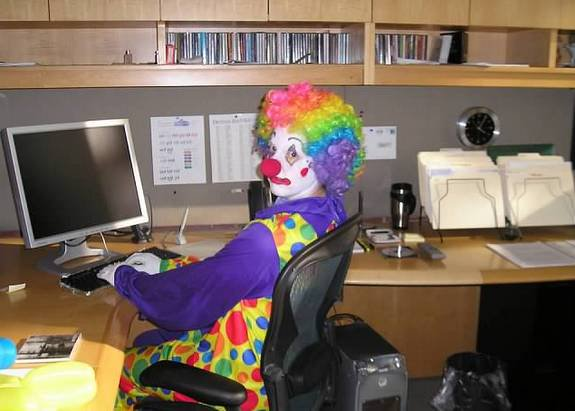

In [3]:
img = cv2.imread('/mydrive/Zdjęcia(Moje)/me.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img)

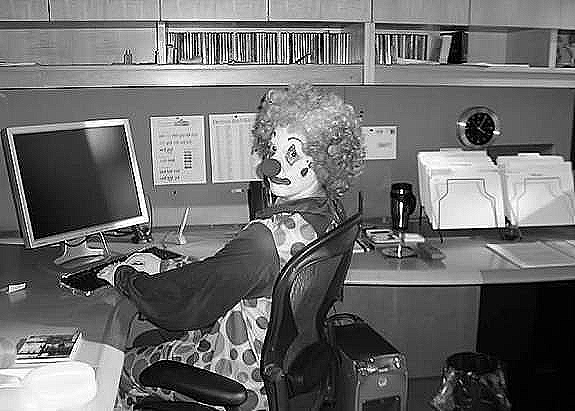

In [4]:
mask = np.array([[0, -1, 0], 
                [-1, 5, -1], 
                [0, -1, 0]])

img_f = cv2.filter2D(img_gray, -1, kernel=mask)
cv2_imshow(img_f)

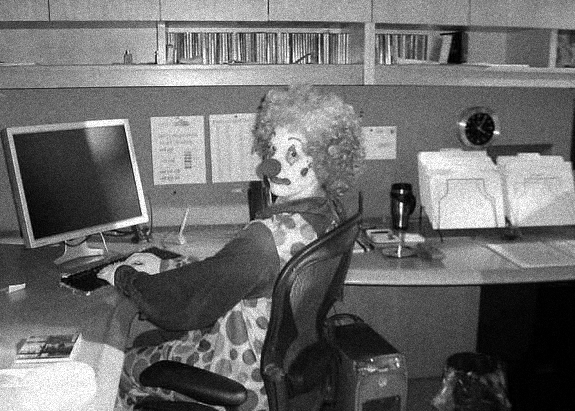

In [5]:
noise_p = skimage.util.random_noise(img_gray, mode="poisson")
img_p = np.array(255*noise_p, dtype=np.uint8)
cv2_imshow(img_p)

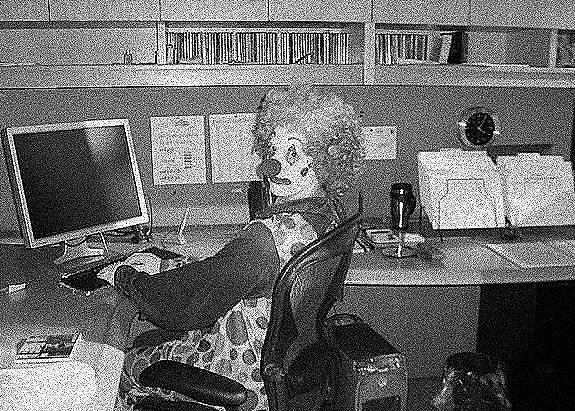

In [6]:
img_fp = cv2.filter2D(img_p, -1, kernel=mask)
cv2_imshow(img_fp)

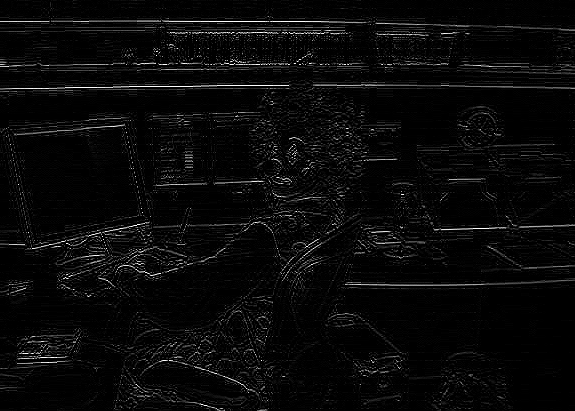

In [7]:
prewitt_mask = np.array([[1, 0, 0],
                         [-1, 0, 0],
                         [0, 0, 0]])


img_fm = cv2.filter2D(img_f, -1, kernel=prewitt_mask)
cv2_imshow(img_fm)

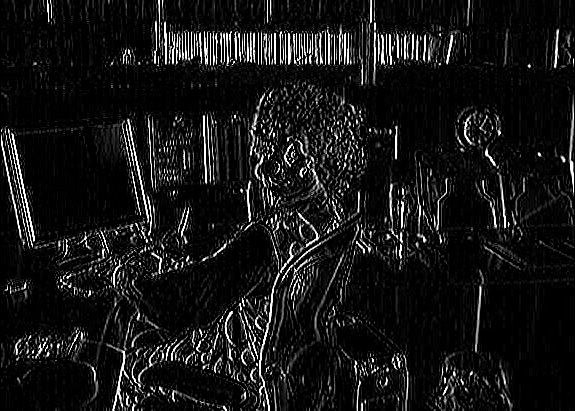

In [8]:
prewitt_mask = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]])


img_fm = cv2.filter2D(img_f, -1, kernel=prewitt_mask)
cv2_imshow(img_fm)

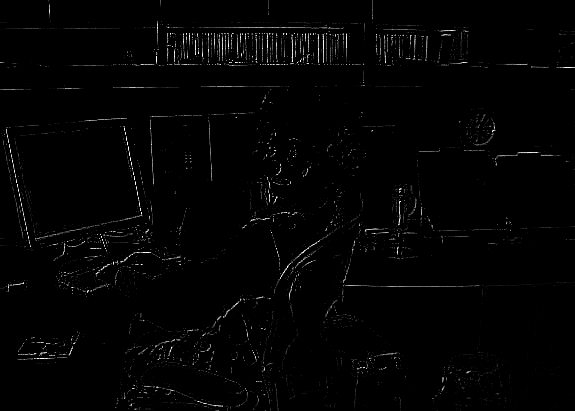

In [9]:
prewitt_mask = np.array([[-1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]])


img_fm = cv2.filter2D(img_f, -1, kernel=prewitt_mask)
cv2_imshow(img_fm)

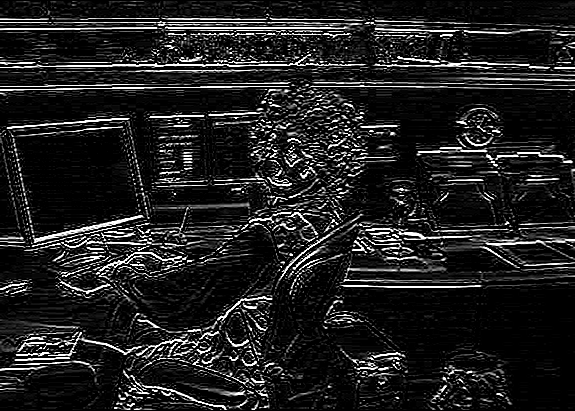

In [ ]:
img_s = cv2.Sobel(img_f, -1, 0, 1)

cv2_imshow(img_s)

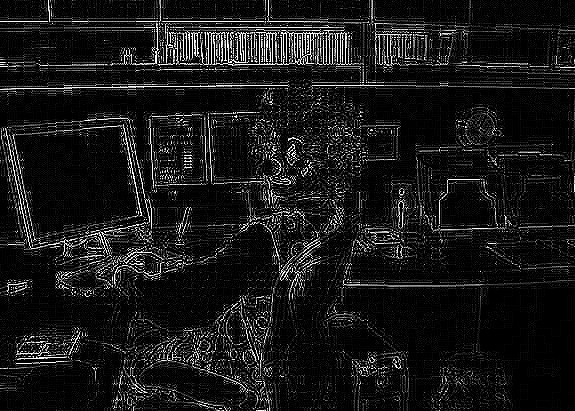

In [ ]:
img_lap = cv2.Laplacian(img_f, -1)

cv2_imshow(img_lap)

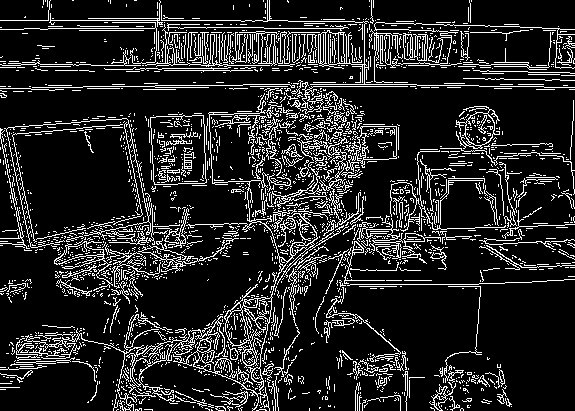

In [ ]:
img_c = cv2.Canny(img_f, 130, 170)

cv2_imshow(img_c)

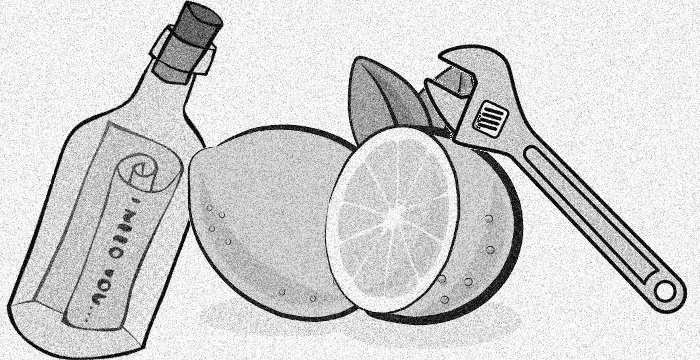

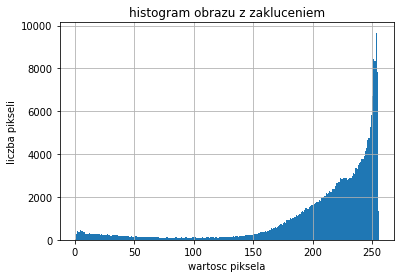

In [10]:
ob = cv2.imread('/mydrive/obrazek_w_1.jpg')
ob_gray = cv2.cvtColor(ob, cv2.COLOR_BGR2GRAY)

cv2_imshow(ob_gray)

plt.figure()
plt.hist(ob_gray.ravel(), 256, [0,256])
plt.title("histogram obrazu z zakluceniem")
plt.xlabel("wartosc piksela")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.show()

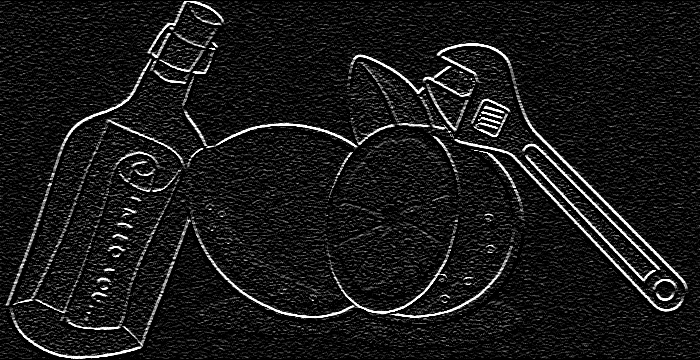

In [11]:
mask = np.array([[1, 1, 1],
                 [0, 0, 0],
                 [-1, -1, -1],
                 ])



blur = cv2.filter2D(ob_gray, -1, kernel = mask)
cv2_imshow(blur)


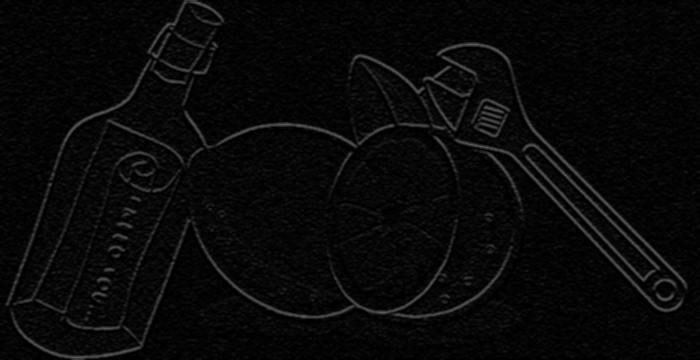

In [17]:
mask2 = np.ones((3,3), dtype = np.float32)/25
blur2 = cv2.filter2D(blur, -1, kernel = mask2)
cv2_imshow(blur2)

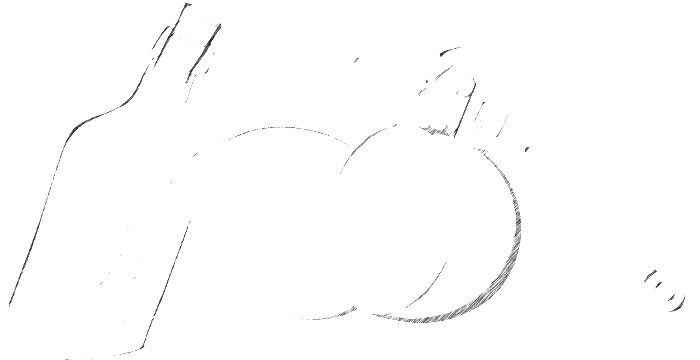

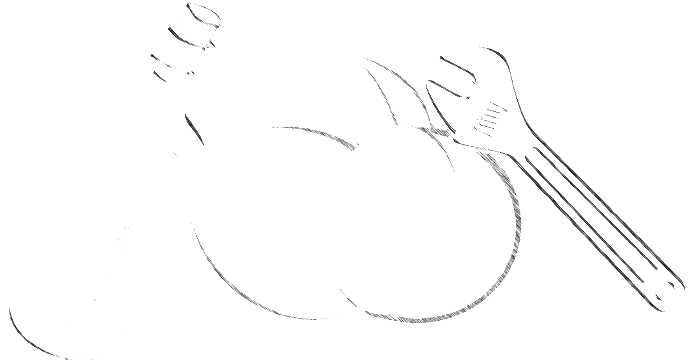

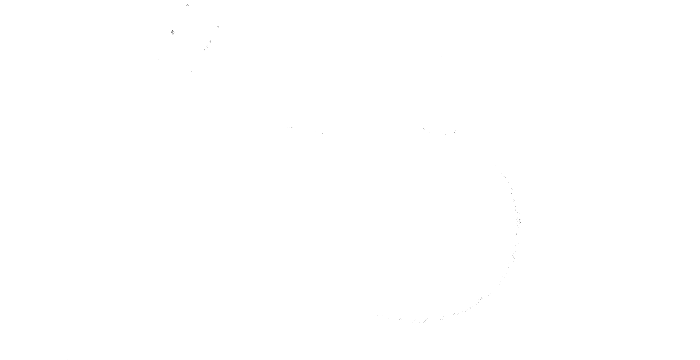

In [21]:
kernelx = np.array([[0,0,0,0,1],
                    [0,0,0,1,0],
                    [0,0,1,0,0],
                    [0,1,0,0,0],
                    [1,0,0,0,0]])


kernely = np.array([[1,0,0,0,0],
                    [0,1,0,0,0],
                    [0,0,1,0,0],
                    [0,0,0,1,0],
                    [0,0,0,0,1]])
img_prewittx = cv2.filter2D(ob_gray, -1, kernel = kernelx)
img_prewitty = cv2.filter2D(ob_gray, -1, kernel = kernely)

img_sum = cv2.add(kernelx, kernely)

img_sum_p = cv2.filter2D(ob_gray, -1, kernel = img_sum)


cv2_imshow(img_prewittx)
cv2_imshow(img_prewitty)
cv2_imshow(img_sum_p)